In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from fastai2.tabular.all import *
from ipywidgets import interact, interact_manual , interactive

pd.set_option('display.max_rows', 200)
from matplotlib.pyplot import figure
from pylab import rcParams


In [3]:
# Data extracted from:
#URL = "https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv"
filename = "covid_19_data.csv"
df = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv',index_col=0,parse_dates=[0])
#  open date field
#df = add_datepart(df, 'ObservationDate',drop=False)
#df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format='%Y-%M-%d')   #  '%M/%d/%Y'

FileNotFoundError: [Errno 2] File /kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv does not exist: '/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv'

In [4]:
!ls '/kaggle/input/over65/population_by_age.csv'

ls: cannot access '/kaggle/input/over65/population_by_age.csv': No such file or directory


In [5]:
filename1= "population.csv"
dpop = pd.read_csv('/kaggle/input/worldpopulation/population.csv',index_col=0,sep=';')

### data on population by country by age
filename2 = '/kaggle/input/over65/population_by_age.csv'
d65 = pd.read_csv('/kaggle/input/over65/population_by_age.csv',index_col=0,sep=';')
# merge corona virus data with country population 
#df = pd.merge(df,dpop,left_on="Country/Region",right_on="Country")

##  last date with data
last_date=df['ObservationDate'].tail(1)
last_date =str(last_date.values)[2:12]
last_date

FileNotFoundError: [Errno 2] File /kaggle/input/worldpopulation/population.csv does not exist: '/kaggle/input/worldpopulation/population.csv'

In [6]:
country_list = df['Country/Region'].unique().tolist()
country_list.sort()

def check_by_country(country=country_list,tot=4,rate=0.01):
    df_filtered = df[df['Country/Region'] == country].copy()
    res_confirmed=df_filtered[['Confirmed','Deaths']].groupby([df_filtered['ObservationDate']]).sum()
    res_acc = res_confirmed[res_confirmed['Confirmed'] > 100]
    res_tot = res_acc.diff() 
    res_tot['Deaths_mov']    = res_tot['Deaths'].rolling(5).mean()
    rates=res_tot['Deaths_mov'].pct_change()[-5:]
    #return rates
    #print(rates)
    #ac = (rates.values > 0.05)
    ac = np.count_nonzero((rates.values > rate))
    #print(ac)
    if ac >=tot :
        return True
    else:
        return False
    

NameError: name 'df' is not defined

In [0]:

result_list = []

for country in country_list:
    if check_by_country(country,4,0.03):
        print(country)
        result_list.append(country)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


Algeria
Azerbaijan
Bangladesh
Chile
Iraq
Kuwait
Nigeria
Sudan


In [0]:
def extract_data(country):
  print("******",country)
  df_filtered = df[df['Country/Region'] == country].copy()
  population = dpop[dpop.index== country].values[0][0]
  #ratio_65 =  d65[d65.index==country]['Ratio Old'].values[0]
  #  CONFIRMED - filter and calculate daily values 
  res_confirmed=df_filtered[['Confirmed','Deaths']].groupby([df_filtered['ObservationDate']]).sum()
  res_acc = res_confirmed[res_confirmed['Confirmed'] > 100]
  res_tot = res_acc.diff()
  
  ratio = res_acc['Deaths']/res_acc['Confirmed']   ### ratio of accumulated data,not daily
  res_tot['Deaths_acc']    =  res_acc['Deaths']
  res_tot['Deaths_mov']    = res_tot['Deaths'].rolling(5).mean()
  res_tot['Confirmed_mov'] = res_tot['Confirmed'].rolling(5).mean()
  res_tot['Ratio ']        = ratio
  res_tot['Deaths_mov_capita'] = res_tot['Deaths_mov'] * 1000000 / population
  #res_tot['Deaths_mov_old_capita'] = res_tot['Deaths_mov'] * 1000000 / (population * ratio_65) 
  res_tot['Confirmed_mov_capita'] = res_tot['Confirmed_mov'] * 1000000 / population
  res_tot['Deaths_acc_capita'] = res_tot['Deaths_acc'] * 1000000 / population  
  res_tot = res_tot.dropna()
  return res_tot , population , "aaa"

****** Algeria
****** Azerbaijan
****** Bangladesh
****** Chile
****** Iraq
****** Kuwait
****** Nigeria
****** Sudan


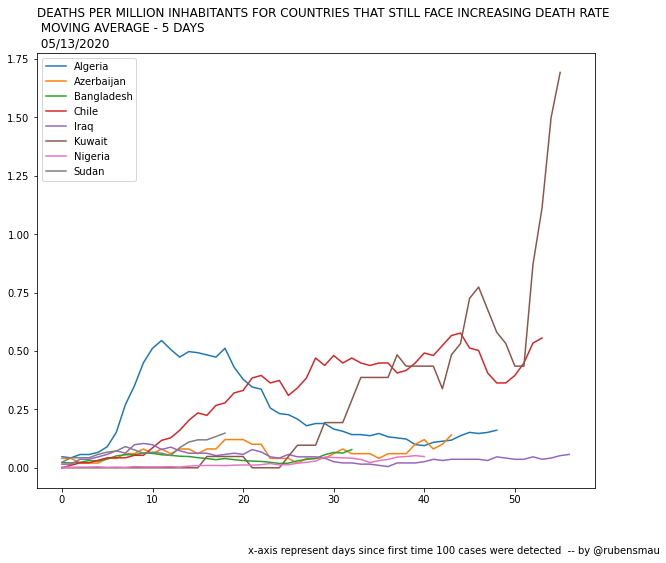

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

### PLOT CHART OF DEATHS PER MILLION INHABITANTS - MOVING AVERAGE - 5 DAYS
#figure(num=None, figsize=(40,30), dpi=120, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
for country in  result_list:
  series,population,over65 = extract_data(country)
  x = range(len(series))
  ax.plot(x,series['Deaths_mov_capita'],label=country)
  #print(country, series[['Deaths','Deaths_mov_capita']].tail(1),population)
plt.legend(loc='upper left')
#plt.title(f'LAST DATE {last_date}  -------DEATHS PER MILLION INHABITANTS - MOVING AVERAGE - 5 DAYS   ',loc='right')
plt.title(f'DEATHS PER MILLION INHABITANTS FOR COUNTRIES THAT STILL FACE INCREASING DEATH RATE \n MOVING AVERAGE - 5 DAYS   \n {last_date} ',loc='left')
plt.figtext(0.99, 0.01, "x-axis represent days since first time 100 cases were detected  -- by @rubensmau", horizontalalignment='right')
plt.show()
#plt.savefig('death_rate.png')
#plt.close()

# DADOS COMPARATIVOS POR MUNICIPIO, ESTADOS DO BRASIL

In [3]:
import pandas as pd

In [4]:

!wget  https://data.brasil.io/dataset/covid19/caso.csv.gz -O novoscasos.csv.gz   ### overwrite old files if exist
!gunzip '/kaggle/working/novoscasos.csv.gz'    



--2020-07-30 10:22:53--  https://data.brasil.io/dataset/covid19/caso.csv.gz
Resolving data.brasil.io (data.brasil.io)... 172.67.71.45, 104.26.8.175, 104.26.9.175, ...
Connecting to data.brasil.io (data.brasil.io)|172.67.71.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4442173 (4.2M) [application/gzip]
Saving to: ‘novoscasos.csv.gz’

novoscasos.csv.gz   100%[===================>]   4.24M  3.72MB/s    in 1.1s    

2020-07-30 10:22:55 (3.72 MB/s) - ‘novoscasos.csv.gz’ saved [4442173/4442173]

gzip: /kaggle/working/novoscasos.csv.gz: No such file or directory


In [7]:
#file = '/kaggle/working/novoscasos.csv'
#file = '/kaggle/input/brasil/novoscasos.csv'
file = 'novoscasos.csv'
df_acc = pd.read_csv(file,index_col=0,parse_dates=[0])



In [8]:

df_acc = df_acc.reset_index()
df_acc = df_acc.sort_values(by = ['place_type', 'state','city','date',], ascending = [False,True, True,True])
df_acc = df_acc.reset_index()

# retrieve last date in dataset
last_date = df_acc[df_acc['is_last']==True]['date'].head(1).values
last_date =str(last_date)[2:12]
last_date

# calculate daily figures from accumulated ones
df_acc['deaths_daily'] = df_acc['deaths'].astype('float64').diff()
df_acc['confirmed_daily'] = df_acc['confirmed'].astype('float64').diff()

# calculate moving average over 5 days
df_acc['deaths_mov']    = df_acc['deaths_daily'].rolling(7).mean()
df_acc['confirmed_mov'] = df_acc['confirmed_daily'].rolling(7).mean()

# calculate per 1million inhabitants 
df_acc['confirmed_daily_per_100k_mov'] = df_acc['confirmed_mov']  * 1000000 / df_acc['estimated_population_2019']
df_acc['deaths_daily_per_100k_mov']    = df_acc['deaths_mov']  * 1000000 / df_acc['estimated_population_2019']


In [9]:
def extract_data_city(df,searched):
    df = df[df['city']== searched]
    return df[df['confirmed'] > 100]

# sum all columns data for the same date
def extract_data_br(df):
    df = df[df['place_type']=='state']
    df = df.groupby([df['date']]).sum()
    df['deaths_daily_per_100k_mov'] = df['deaths_mov'] * 1000000  / 210000000
    df['deaths_daily_per_100k_mov'].clip(lower=0,inplace=True)   ### zero negative values, error from 1st day calculation
    return df[(df['confirmed'] > 100) ][6:]

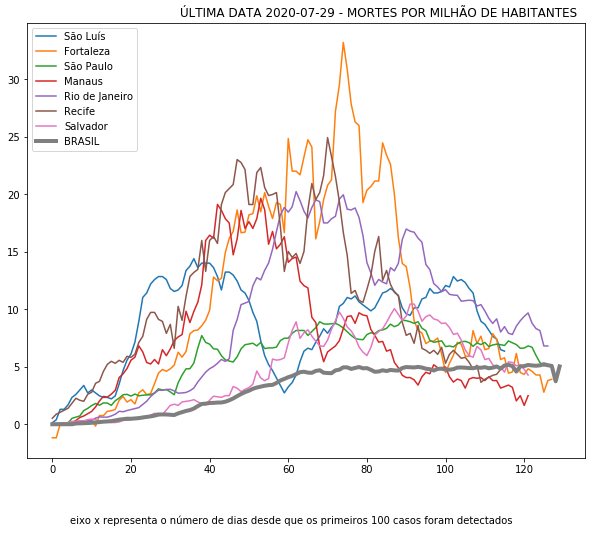

In [13]:
### PLOT CHART OF DEATHS PER MILLION INHABITANTS - MOVING AVERAGE - 5 DAYS
#figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
fig, ax = plt.subplots()
cities =  ['São Luís','Fortaleza','São Paulo','Manaus','Rio de Janeiro','Recife','Salvador']
#cities =  ['São Luís','Teresina']
for label in cities:
  series  = extract_data_city(df_acc,label)
  x = range(len(series))
  ax.plot(x,series['deaths_daily_per_100k_mov'],label=label)
# extract and plot data for Brazil
seriesBR = extract_data_br(df_acc)
xBR = range(len(seriesBR))
ax.plot(xBR,seriesBR['deaths_daily_per_100k_mov'],label='BRASIL', linewidth=4)
plt.legend(loc='upper left')
#plt.title(f'LAST DATE {last_date}  -------DEATHS PER MILLION INHABITANTS - MOVING AVERAGE - 7 DAYS   ',loc='right')
plt.title(f'ÚLTIMA DATA {last_date} - MORTES POR MILHÃO DE HABITANTES  ',loc='right')
#plt.title(f'DEATHS PER MILLION INHABITANTS - MOVING AVERAGE - 5 DAYS   ',loc='right')
#plt.figtext(0.99, 0.01, "x-axis represent days since first time 100 cases were detected", horizontalalignment='right')
plt.figtext(0.8, 0.01, "eixo x representa o número de dias desde que os primeiros 100 casos foram detectados", horizontalalignment='right')
#plt.show()
plt.savefig('death_by_cities.png')

# COMPARTIVO DE NUMERO DE MORTES COM IDH NAS CAPITAIS
IDH = Índice de Desenvolvimento Humano


In [12]:
file = '/kaggle/input/idhcapitais/idh_capitais.csv'
capitais = pd.read_csv(file,index_col=0,encoding='ISO-8859-1',sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/idhcapitais/idh_capitais.csv'

In [0]:
df_acc.columns

Index(['index', 'date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'city_ibge_code', 'confirmed_per_100k_inhabitants', 'death_rate',
       'deaths_daily', 'confirmed_daily', 'deaths_mov', 'confirmed_mov',
       'confirmed_daily_per_100k_mov', 'deaths_daily_per_100k_mov'],
      dtype='object')

In [0]:
lcap = []
for capital in capitais['name']:
    res = extract_data_city(df_acc,capital)
    try:
        lcap.append(
            {
                'capital': capital,
                'deaths/M': res['deaths_daily_per_100k_mov'].tail(1).values[0],  ### averaged death number for yesterday
                'idh':  capitais[capitais['name']==capital]['idh'].values[0],
                'pop': res['estimated_population_2019'].tail(1).values[0] / 1000000
            }
        )
    except:
        continue

dcap = pd.DataFrame(lcap)

In [0]:
import altair as alt

chart = alt.Chart(dcap).mark_point().encode(
    alt.Size('pop:Q'),
    alt.Y('idh:Q',
        scale=alt.Scale(domain=(0.7,0.9))
    ),
    x='deaths/M:Q',
    
    tooltip=['capital','deaths/M','idh', 'pop']
).interactive()
chart

alt.Chart(...)

In [0]:
chart.save("covid_vs_idh.html")

In [0]:
dcap

,capital,deaths/M,idh,pop
0,Florianópolis,0.000000,0.847,0.500973
1,Vitória,8.837411,0.845,0.362097
2,Brasília,0.729620,0.824,3.015268
3,Curitiba,0.206921,0.823,1.933105
4,Belo Horizonte,0.238847,0.810,2.512070
5,Porto Alegre,0.539167,0.805,1.483771
6,São Paulo,6.268353,0.805,12.252023
7,Goiânia,0.527665,0.799,1.516113
8,Rio de Janeiro,10.745802,0.799,6.718903
9,Palmas,0.668612,0.788,0.299127


In [0]:
capital='São Paulo'
extract_data_city(df_acc,capital)

,index,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_daily,confirmed_daily,deaths_mov,confirmed_mov,confirmed_daily_per_100k_mov,deaths_daily_per_100k_mov
74387,37248,2020-03-16,SP,São Paulo,city,145,0,18,False,12252023.0,3550308.0,1.18348,0.0000,0.0,83.0,0.0,26.0,2.122099,0.000000
74388,37247,2020-03-17,SP,São Paulo,city,156,1,19,False,12252023.0,3550308.0,1.27326,0.0064,1.0,11.0,0.2,27.6,2.252689,0.016324
74389,37246,2020-03-18,SP,São Paulo,city,214,3,20,False,12252023.0,3550308.0,1.74665,0.0140,2.0,58.0,0.6,37.0,3.019909,0.048972
74390,37245,2020-03-19,SP,São Paulo,city,259,5,21,False,12252023.0,3550308.0,2.11394,0.0193,2.0,45.0,1.0,43.0,3.509624,0.081619
74391,37244,2020-03-20,SP,São Paulo,city,306,9,22,False,12252023.0,3550308.0,2.49755,0.0294,4.0,47.0,1.8,48.8,3.983016,0.146915
74392,37243,2020-03-25,SP,São Paulo,city,722,44,23,False,12252023.0,3550308.0,5.89290,0.0609,35.0,416.0,8.8,115.4,9.418853,0.718249
74393,37242,2020-03-26,SP,São Paulo,city,899,53,24,False,12252023.0,3550308.0,7.33756,0.0590,9.0,177.0,10.4,148.6,12.128609,0.848839
74394,37241,2020-03-27,SP,São Paulo,city,1044,62,25,False,12252023.0,3550308.0,8.52104,0.0594,9.0,145.0,11.8,166.0,13.548783,0.963106
74395,37240,2020-03-30,SP,São Paulo,city,1233,103,26,False,12252023.0,3550308.0,10.06364,0.0835,41.0,189.0,19.6,194.8,15.899415,1.599736
74396,37239,2020-03-31,SP,São Paulo,city,1885,121,27,False,12252023.0,3550308.0,15.38521,0.0642,18.0,652.0,22.4,315.8,25.775335,1.828270
